<a href="https://colab.research.google.com/github/Rvoiiima/python-math-physics/blob/main/programming_python_8_stack_queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 入門 第8回 stack queue
- [資料](https://ryo-iijima.com/blog/wp-content/uploads/2021/01/python-8-stack-queue.pdf)

## データ構造入門
- スタック(Stack)
- キュー(Queue)
## データ構造を応用したシミュレーション
- 現実世界寄り
- ソフトウェア寄り



## データ構造とは

- プログラムの中で，データをどのようにして格納したり，取り出したりするかという構造のこと

### 代表的なデータ構造
- リスト(第5回授業)
- 辞書
- Stack
- Queue

など

## Stack (Last In First Out, LIFO)
1箇所からのみ出し入れができる箱

## Queue (First In First Out, FIFO)
入り口，出口がそれぞれ別に1つずつ固定された箱

# それぞれの主な利用用途
## Stack
メモリやレジスタの容量を節約したい計算
- 逆ポーランド記法による計算: Stackを用いると，メモリを節約しながら簡単に実装できる

## Queue
待ち行列の解析（待ち行列理論）
- リアルな待ち行列
- 交通渋滞
- オンラインリアルタイム動画(Zoom，Skypeなど)のパケット受信

# Stackの例
list で表現可能

In [1]:
S = []

S.append(2)
print(S)

S.append(5)
print(S)

S.append(8)
print(S)

S.pop()
print(S)

S.pop()
print(S)

S.pop()
print(S)


[2]
[2, 5]
[2, 5, 8]
[2, 5]
[2]
[]


# Queue の例

In [ ]:
import queue

Q = queue.Queue()

Q.put(2)
# [2]
Q.put(5)
# [2, 5]
Q.put(8)
# [2, 5, 8]

print(Q.get())
#[5, 8]
print(Q.get())
#[8]
print(Q.get())
#[]

# Queue の考え方を用いた待ち行列シミュレーション
Queueモジュールを使わなくてもできるものにしました

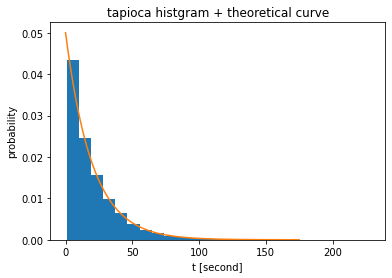

In [2]:
# 待ち行列シミュレーション簡易版
import random # 店への客はランダムに到着する
import matplotlib.pyplot as plt
import numpy as np

num_person = 0
time = 0

# 1秒あたり，客が到着する確率
p = 0.05
# 最後の客が到着してからの経過時間
time_dif = 0
# 客の到着間隔をリストに保存しておく
time_dif_list = []

TIME_END = 360000# 検証時間

for i in range(TIME_END):
  x = random.random()
  if (x < p): 
    num_person += 1
    # print("客の到着: ", num_person, "人目", "時間: ", i)
    time_dif_list.append(time_dif) # 前の客からの到着時間から，次の到着時間までの差をlistに入れる．
    time_dif = 0 # 到着した人が最後の客となるので，最後の客が到着してからの経過時間を0にする
  
  time_dif += 1 # for 文 1回のループで，1秒が経過する

#print(time_dif_list)

#plt.hist(time_dif_list, bins=25) # ヒストグラムの作成
plt.title('tapioca histgram + theoretical curve')
plt.xlabel('t [second]')
plt.ylabel('probability')
plt.hist(time_dif_list, bins=25, density=True)


# import numpy as np　が必要
x = np.arange(0, 175, 0.01)
y = p * np.exp(-1*p*x)

plt.plot(x, y)



# 応用　待ち行列理論　ポアソン分布の確認

シミュレーション終了後の待ち行列の長さ 2


(array([7.44923077e-02, 2.24476923e-01, 0.00000000e+00, 3.45215385e-01,
        3.45646154e-01, 0.00000000e+00, 2.61476923e-01, 1.57630769e-01,
        0.00000000e+00, 7.83230769e-02, 3.27076923e-02, 0.00000000e+00,
        1.26769231e-02, 4.00000000e-03, 0.00000000e+00, 1.35384615e-03,
        3.38461538e-04, 0.00000000e+00, 9.23076923e-05, 3.07692308e-05]),
 array([ 0.  ,  0.65,  1.3 ,  1.95,  2.6 ,  3.25,  3.9 ,  4.55,  5.2 ,
         5.85,  6.5 ,  7.15,  7.8 ,  8.45,  9.1 ,  9.75, 10.4 , 11.05,
        11.7 , 12.35, 13.  ]),
 <a list of 20 Patch objects>)

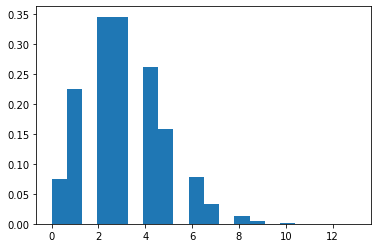

In [3]:
# 待ち行列シミュレーション簡易版 (Queueを使わずにできるもの)　
import random # 店への客はランダムに到着する
import matplotlib.pyplot as plt
import numpy as np


time = 0

# 1秒あたり，客が到着する確率
p1 = 0.005
# 1秒あたり、客が抜ける確率
p2 = 0.02

# 最後の客が到着してからの経過時間
time_dif = 0
# 客の到着間隔をリストに保存しておく
time_dif_list = []
num_person_list = []
TIME_END =600# 検証時間
TIMES = 100000

for t in range(TIMES):
  num_person = 0
  for i in range(TIME_END):
    x = random.random()
    if (x < p1): 
      num_person += 1
    # print("客の到着: ", num_person, "人目", "時間: ", i)
      time_dif_list.append(time_dif) # 前の客からの到着時間から，次の到着時間までの差をlistに入れる．
      time_dif = 0 # 到着した人が最後の客となるので，最後の客が到着してからの経過時間を0にする
  
    time_dif += 1 # for 文 1回のループで，1秒が経過する
  num_person_list.append(num_person)


print("シミュレーション終了後の待ち行列の長さ", num_person)
#print(time_dif_list)


#plt.hist(time_dif_list, bins=12) # ヒストグラムの作成
#plt.hist(time_dif_list, bins=, density=True)
plt.hist(num_person_list, bins=20, density=True)


# import numpy as np　が必要
#x = np.arange(0, 175, 0.01)
#y = p * np.exp(-1*p*x)

#plt.plot(x, y)
